In [35]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/510/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/510/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/510/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/510/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/510/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/510/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/510/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/510/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/510/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/510/rr.csv',delimiter=', ')
df['cluster'] = 1

df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/510/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/510/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/510/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/510/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/510/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/510/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/510/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/510/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/510/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/510/rv.csv',delimiter=', ')
df2['cluster'] = 0

df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

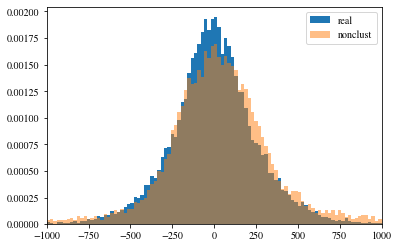

In [38]:
plt.hist(df[df.i220!=-9999].i220,density=True,bins=100,range=(-1000,1000),label='real')
plt.hist(df2[df2.i220!=-9999].i220,density=True,bins=100,alpha=0.5,range=(-1000,1000),label='nonclust')
plt.xlim(-1000,1000)
plt.legend()

In [39]:
df5 = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df5['i100'] = np.loadtxt('output/beam/pr100.csv',delimiter=', ')
df5['i143'] = np.loadtxt('output/beam/pr143.csv',delimiter=', ')
df5['i217'] = np.loadtxt('output/beam/pr217.csv',delimiter=', ')
df5['i353'] = np.loadtxt('output/beam/pr353.csv',delimiter=', ')
df5['i545'] = np.loadtxt('output/beam/pr545.csv',delimiter=', ')
df5['i857'] = np.loadtxt('output/beam/pr857.csv',delimiter=', ')
df5['i090'] = np.loadtxt('output/beam/ar90.csv',delimiter=', ')
df5['i150'] = np.loadtxt('output/beam/ar150.csv',delimiter=', ')
df5['i220'] = np.loadtxt('output/beam/ar220.csv',delimiter=', ')
df5['iros'] = np.loadtxt('output/beam/rr.csv',delimiter=', ')
df5['cluster'] = 1

df4 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df4['i100'] = np.loadtxt('output/beam/pv100.csv',delimiter=', ')
df4['i143'] = np.loadtxt('output/beam/pv143.csv',delimiter=', ')
df4['i217'] = np.loadtxt('output/beam/pv217.csv',delimiter=', ')
df4['i353'] = np.loadtxt('output/beam/pv353.csv',delimiter=', ')
df4['i545'] = np.loadtxt('output/beam/pv545.csv',delimiter=', ')
df4['i857'] = np.loadtxt('output/beam/pv857.csv',delimiter=', ')
df4['i090'] = np.loadtxt('output/beam/av90.csv',delimiter=', ')
df4['i150'] = np.loadtxt('output/beam/av150.csv',delimiter=', ')
df4['i220'] = np.loadtxt('output/beam/av220.csv',delimiter=', ')
df4['iros'] = np.loadtxt('output/beam/rv.csv',delimiter=', ')
df4['cluster'] = 0

df6 = df5.append(df4, ignore_index=True).reset_index(drop=True)

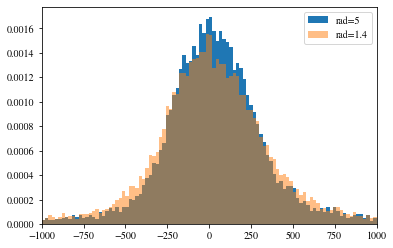

In [47]:
plt.hist(df2[df2.i220!=-9999].i220,density=True,bins=100,range=(-1000,1000),label='rad=5')
plt.hist(df4[df4.i220!=-9999].i220,density=True,bins=100,alpha=0.5,range=(-1000,1000),label='rad=1.4')
plt.xlim(-1000,1000)
plt.legend()

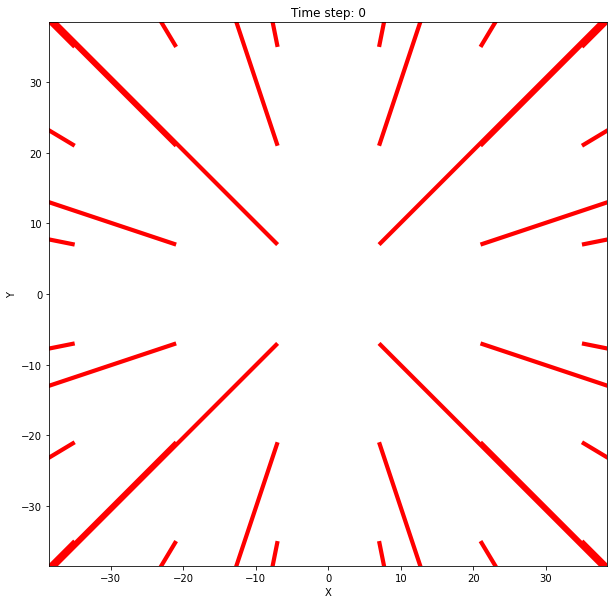

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a grid of positions and velocities
x_positions, y_positions = np.meshgrid(np.linspace(-1, 1, 6), np.linspace(-1, 1, 6))
x_velocities, y_velocities = np.zeros_like(x_positions), np.zeros_like(y_positions)

# Create figure and axes objects for plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('X')
ax.set_ylabel('Y')

# A function that takes the positions and velocities and updates them according to gravity
def iterate_timestep(x_positions, y_positions, x_velocities, y_velocities):
    # Calculate gravitational forces between each particle
    x_f, y_f = gravity_forces(x_positions, y_positions)
    
    # Update velocities
    x_velocities += x_f
    y_velocities += y_f
    
    # Update positions
    x_positions += x_velocities
    y_positions += y_velocities
    
    # Return the updated positions and velocities
    return x_positions, y_positions, x_velocities, y_velocities

# A function that takes the positions and returns a matrix of the gravitational forces applied between each particle
def gravity_forces(x_positions, y_positions):
    x_f, y_f = np.zeros_like(x_positions), np.zeros_like(y_positions)
    for i in range(x_positions.shape[0]):
        for j in range(x_positions.shape[1]):
            for u in range(x_positions.shape[0]):
                for v in range(x_positions.shape[1]):
                    # Don't calculate the force on a particle due to itself
                    if i == u and j == v:
                        continue
                    # Calculate the force in the x and y directions
                    x_f[i, j] += -(x_positions[i, j] - x_positions[u, v])
                    y_f[i, j] += -(y_positions[i, j] - y_positions[u, v])
    return x_f, y_f

# Simulation loop
for _ in range(200):
    # Iterate through one timestep of the simulation
    x_positions, y_positions, x_velocities, y_velocities = iterate_timestep(x_positions, y_positions,
                                                                          x_velocities, y_velocities)
    # Plot the new positions of the particles
    ax.cla()  # Clear the axes
    ax.quiver(x_positions, y_positions, x_velocities, y_velocities, scale=1, color='red')
    ax.set_title(f'Time step: {_}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.pause(0.1)  # Pause for 0.1s to give us time to observe the animation

plt.show()